In [1]:
import numpy as np
from torch.utils.data import Dataset, DataLoader
import json
import torch
from matplotlib import pyplot as plt

In [2]:
parent_folder = 'C:/Users/Aidan/Documents/Winter_2023/BE177B/Code/'
art_json = parent_folder + 'wonglab-capstone/Datateam/Artificial_imset/artificial_kymographs.json'
exp_json = parent_folder + 'wonglab-capstone/Datateam/imset1/experimental_kymograph.json'
models_folder = parent_folder + 'wonglab-capstone/DotsTorch/Trained_models/'

In [3]:

class ExpKymoDataset(Dataset):
    def __init__(self):
        #data loading
        with open(exp_json, 'r') as f:
            kymos = np.asarray(json.loads(f.read()))
        kymos = kymos.astype('float32')
        self.x = torch.from_numpy(kymos)
        self.n_samples = kymos.shape[2]

    def __getitem__(self, index):
        return self.x[:,:,index]

    def __len__(self):
        return self.n_samples
    
class ArtKymoDataset(Dataset):
    def __init__(self):
        #data loading
        with open(art_json, 'r') as f:
            kymos = np.asarray(json.loads(f.read())["kymoset"])
        kymos = kymos.astype('float32')
        kymos = torch.from_numpy(kymos)
        # self.x = kymos[:,None,:,:]
        self.x = kymos
        self.x = self.x[:,None,:,:]
        self.n_samples = kymos.shape[0]

    def __getitem__(self, index):
        return self.x[index,:,:]

    def __len__(self):
        return self.n_samples

In [12]:
def plot_kymos(data, indicies):
    plt.figure(figsize=(12,9))
    for i in range(3):
        y = data[indicies[i]]
        plt.subplot(1,3,i+1)
        plt.xlabel('Time')
        plt.ylabel('Axis Position')
        if i == 0:
            plt.title("Oscillatory")
        if i == 1: 
            plt.title("Polar")
        if i == 2: 
            plt.title("Random")

        plt.xticks(c='w')
        plt.yticks(c='w')
        plt.imshow(y[0,:,:], cmap='plasma')
    plt.tight_layout()
    plt.show()

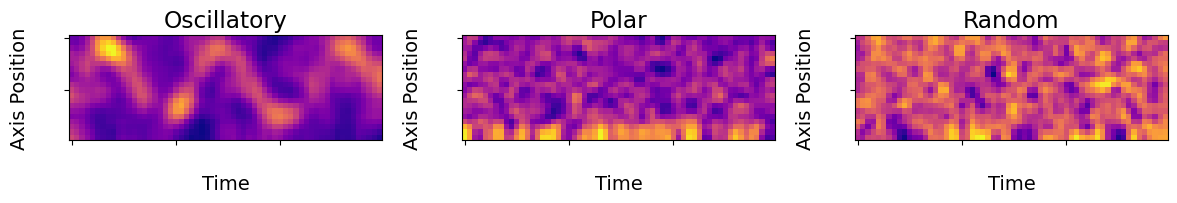

In [13]:
plt.rcParams.update({'font.size': 14})
data = ArtKymoDataset()
plot_kymos(data, [3,101,201])
